In [135]:
import numpy as np
import pandas as pd
import seaborn as sns

In [136]:
from sklearn import metrics

In [137]:
import matplotlib.pyplot as plt

In [138]:
df=pd.read_csv("train.csv")

In [139]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [141]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [142]:
df.duplicated().sum()

0

In [143]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**battery_power:** Total energy a battery can store in one time measured in mAh

**blue:** Has bluetooth or not

**clock_speed:** speed at which microprocessor executes instructions

**dual_sim**: Has dual sim support or not

**fc:** Front Camera mega pixels

**four_g:** Has 4G or not

**int_memory**: Internal Memory in Gigabytes

**m_dep**: Mobile Depth in cm

**mobile_wt:** Weight of mobile phone

**n_cores**: Number of cores of processor

**pc:** Primary Camera mega pixels

**px_height**: Pixel Resolution Height

**px_width**: Pixel Resolution Width

**ram:** Random Access Memory in Mega Bytes

**sc_h:** Screen Height of mobile in cm

**sc_w**: Screen Width of mobile in cm

**talk_time**: longest time that a single battery charge will last when you are

**three_g**: Has 3G or not

**touch_screen**: Has touch screen or not

**wifi**: Has wifi or not

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


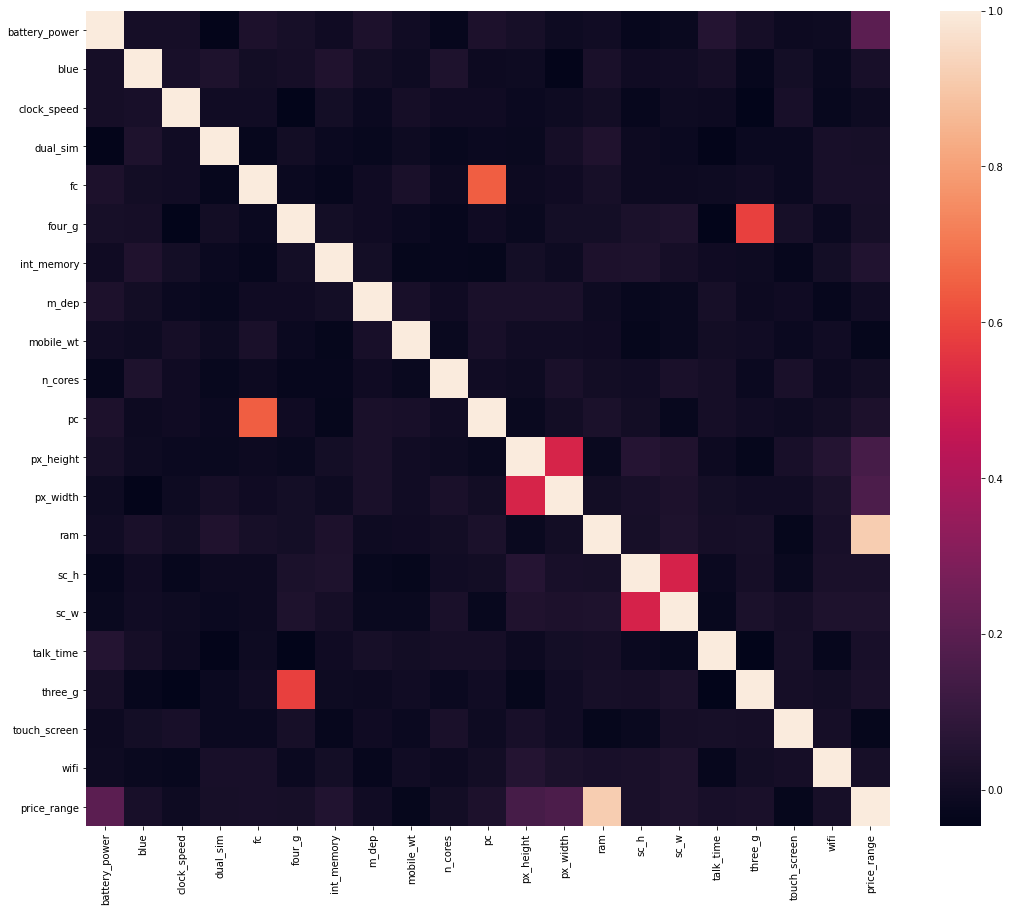

In [144]:

fig=plt.figure(figsize=(18,15))
sns.heatmap(df.corr())

##Price Range

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


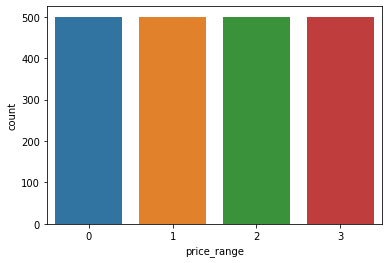

In [145]:
sns.countplot(df['price_range'])

this tells us that count of mobile in each of price range are 

##Battery power


In [146]:
len(df['battery_power'].unique())#can be considered as real values

1094

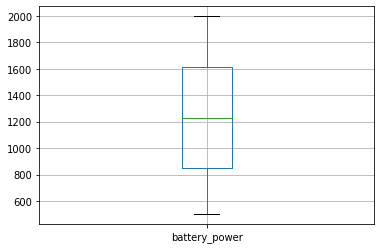

In [147]:
df.boxplot(column='battery_power')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


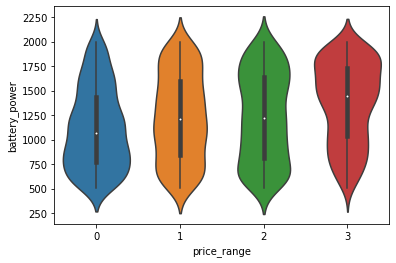

In [148]:
sns.violinplot(df['price_range'],df['battery_power'])

we can see mobiles phones of higher cost have greater battery capacities

##Bluetooth

In [149]:
df[['blue','price_range','battery_power']].groupby(['blue','price_range']).count()

battery_power
blue price_range               
0    0                      257
     1                      255
     2                      257
     3                      241
1    0                      243
     1                      245
     2                      243
     3                      259

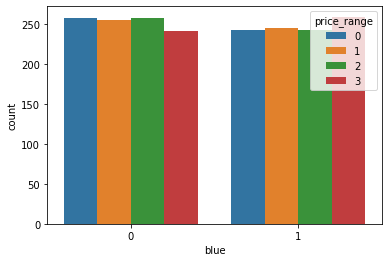

In [150]:
sns.countplot(x=df['blue'],hue=df['price_range'])

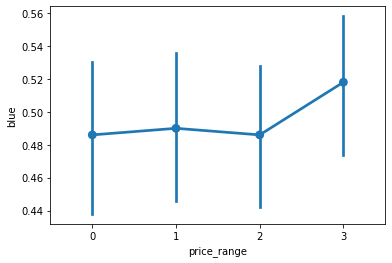

In [151]:
sns.pointplot(y=df['blue'],x=df['price_range'])

mobile phones of higher costs have higher tendency to have bluetooth

##clock_speed

In [152]:
df['clock_speed'].unique()#can be considered as categorical variable

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

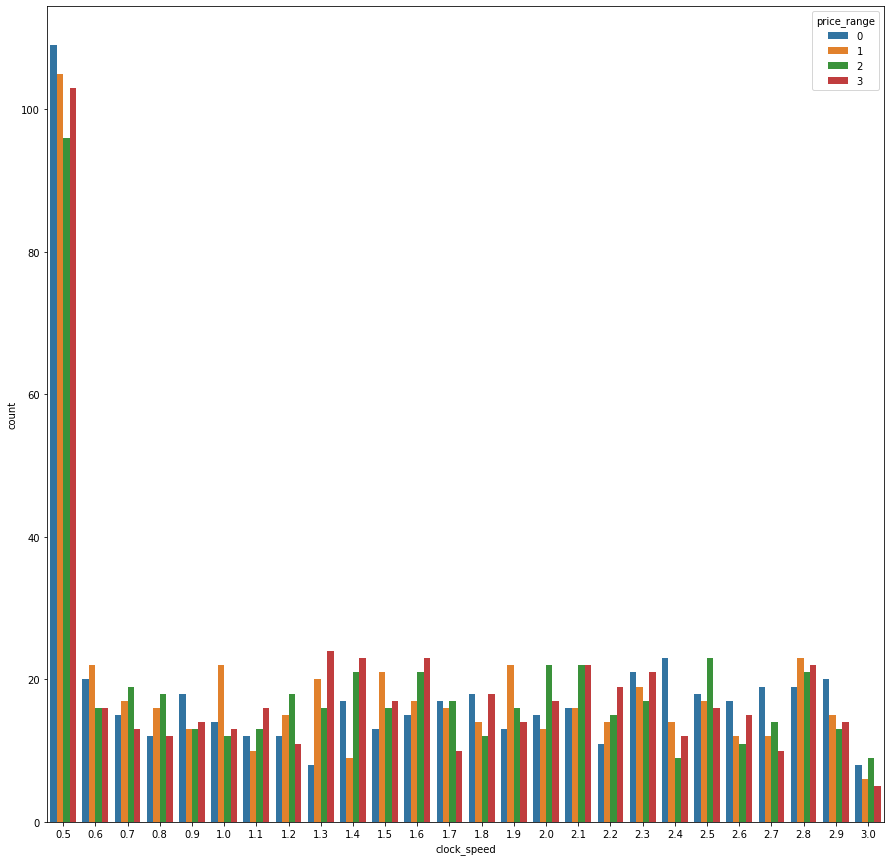

In [153]:
fig=plt.figure(figsize=[15,15])
sns.countplot(x=df['clock_speed'],hue=df['price_range'])

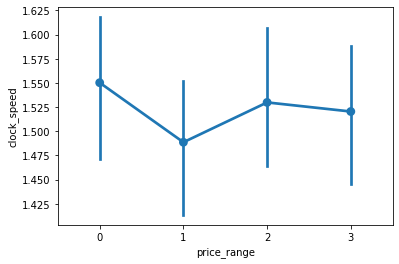

In [154]:
sns.pointplot(y=df['clock_speed'],x=df['price_range'])

clock speed is not much effecting the price beacuse as we can see from the chart that all 4 price categories lie in same frequency or iregular frequency range at every clock speed

##dual_sim - categorical variable

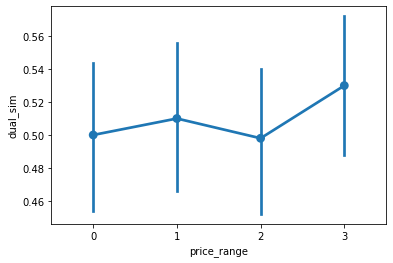

In [155]:
sns.pointplot(y=df['dual_sim'],x=df['price_range'])

we can say that dual sim phones are costly as we can see a spike at 3(very high prize mobile)

##Front Camera


In [156]:
df['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19])

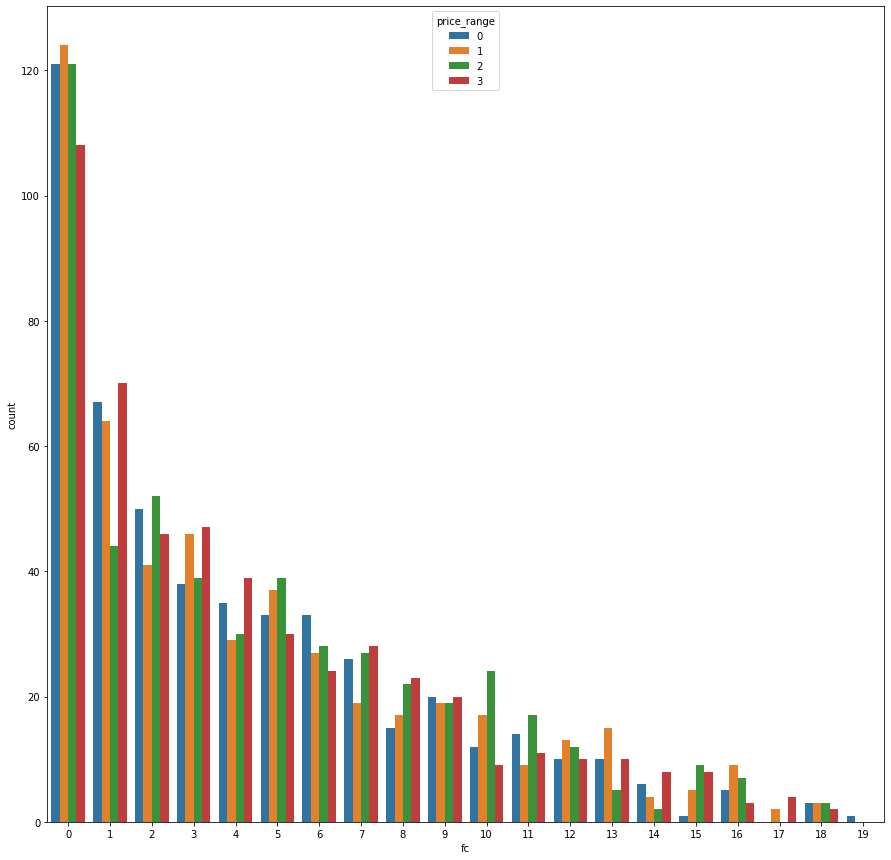

In [157]:
plt.figure(figsize=(15,15))
sns.countplot(x=df['fc'],hue=df['price_range'])

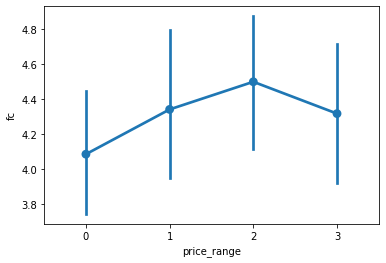

In [158]:

sns.pointplot(y=df['fc'],x=df['price_range'])

comparitively we van say that costlier mobiles have high front camera resolutions

##4g & 3g

In [159]:
df["four_g"].unique()

array([0, 1])

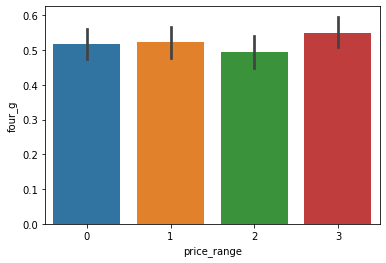

In [160]:
sns.barplot(y=df['four_g'],x=df['price_range'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


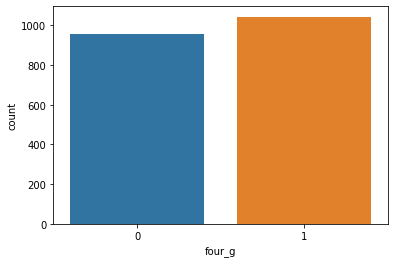

In [161]:
sns.countplot(df['four_g'])

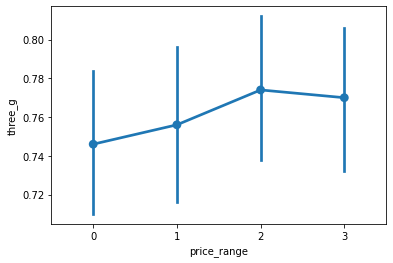

In [162]:
sns.pointplot(y=df['three_g'],x=df['price_range'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


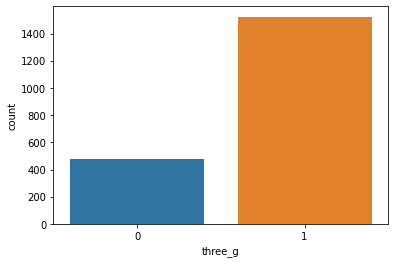

In [163]:
sns.countplot(df['three_g'])

1. costly mobiles are more likely to be 4g and 3g


## internal memory in gb's

In [164]:
df['int_memory'].unique()#can be considerd as continous as well as categorical

array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


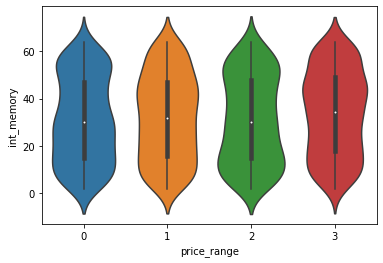

In [165]:
sns.violinplot(df['price_range'],df['int_memory'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


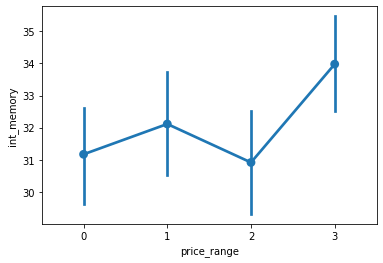

In [166]:
sns.pointplot(df['price_range'],df['int_memory'])

we can see in the plot that 3(costly) is high which signifies that most of costlier mobiles have higher memory compared to rest

##width

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


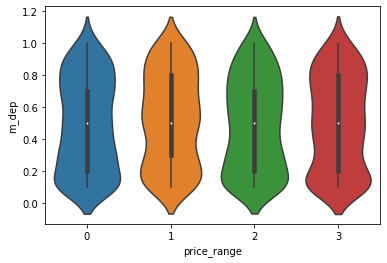

In [167]:
sns.violinplot(df['price_range'],df['m_dep'])

higher frequency of slimer phones are present in all 4 classes

##mobile weight

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


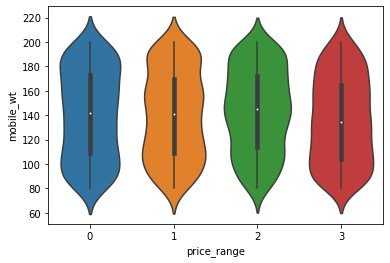

In [168]:
sns.violinplot(df['price_range'],df['mobile_wt'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


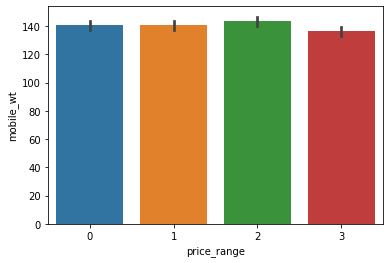

In [169]:
sns.barplot(df['price_range'],df['mobile_wt'])

we can see that 3 is highly densed at lesser values of weight so lighter mobiles costs high

## Number of cores

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


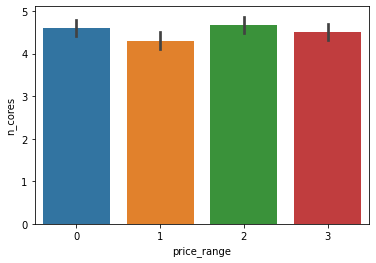

In [170]:
sns.barplot(df['price_range'],df['n_cores'])

rise in mean of 2 and 3 signifies us more the number of cores higher the mobile phone prices are

##main camera

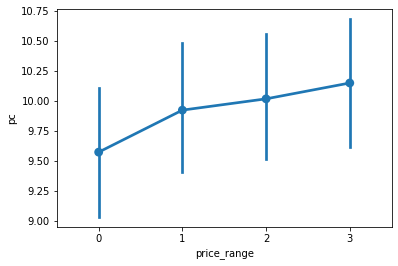

In [171]:
sns.pointplot(y=df['pc'],x=df['price_range'])

main camera pixels has positive corelation with price range

##pixel resolution height and width

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


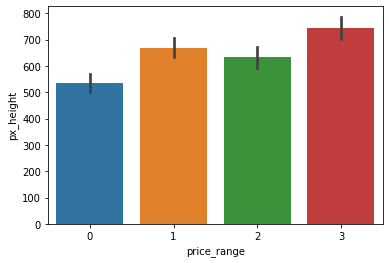

In [172]:
sns.barplot(df['price_range'],df['px_height'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


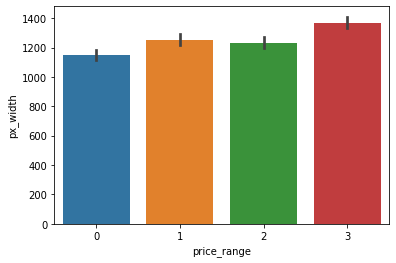

In [173]:
sns.barplot(df['price_range'],df['px_width'])

we can see that the costly mobiles have higher pixel width and height

##RAM

In [174]:
df['ram'].unique()

array([2549, 2631, 2603, ..., 2032, 3057, 3919])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


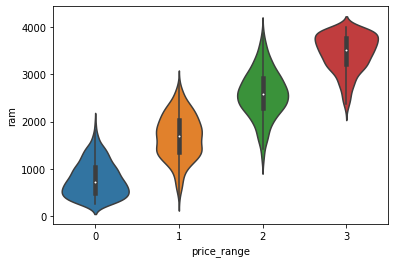

In [175]:
sns.violinplot(df['price_range'],df['ram'])

its very obious from  the plot that higher the ram is higher the cost of mobile phone will be

##screen height and width

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


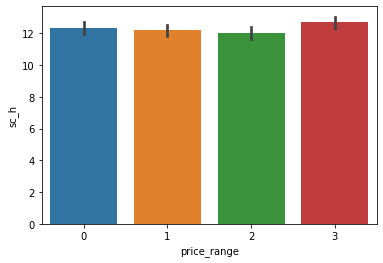

In [176]:
sns.barplot(df['price_range'],df['sc_h'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


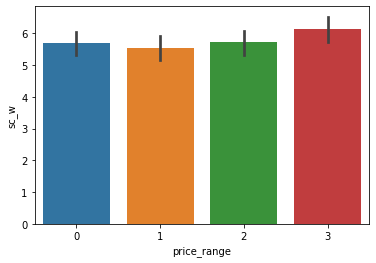

In [177]:
sns.barplot(df['price_range'],df['sc_w'])

slight correlation can be seen

##talktime

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


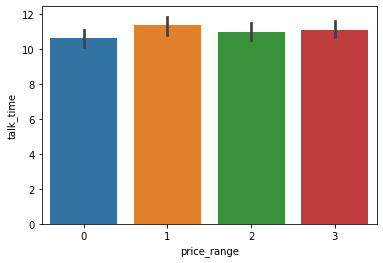

In [178]:
sns.barplot(df['price_range'],df['talk_time'])

a positive corelation can be seen in class 1 and talk time variables
this can be interppreted as mobiles of that price range has more focus on talktime

##touch screen

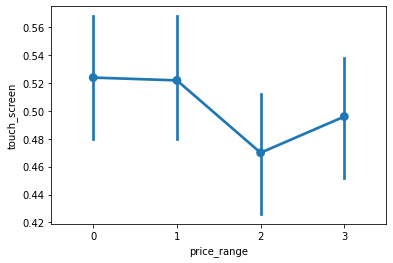

In [179]:
sns.pointplot(y=df['touch_screen'],x=df['price_range'])

significance here is quit different compared to real life senario so nothing usefull or meaning is seen. negative correlation is seen

##wifi

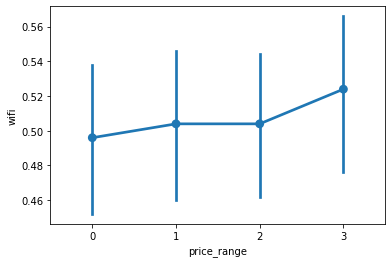

In [180]:
sns.pointplot(y=df['wifi'],x=df['price_range'])

costly mobiles have higher tendency to have have wifi 

In [356]:
y=df['price_range']
X=df.drop('price_range',axis=1)

In [357]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


##Normalizing

In [358]:
from sklearn.preprocessing import StandardScaler

In [359]:
norm=StandardScaler()

In [360]:
X['battery_power']=norm.fit_transform(X[['battery_power']])
X['mobile_wt']=norm.fit_transform(X[['mobile_wt']])
X['px_height']=norm.fit_transform(X[['px_height']])
X['px_width']=norm.fit_transform(X[['px_width']])
X['ram']=norm.fit_transform(X[['ram']])

X['int_memory']=norm.fit_transform(X[['int_memory']])

##splitting data

In [361]:
from sklearn import model_selection

In [362]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.33, random_state = 101)

##Logistic Regression

In [188]:
from sklearn import linear_model

In [278]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

without nomalization

In [272]:
lm.score(X_train,y_train)

0.7902985074626866

In [273]:
lm.score(X_test,y_test)

0.7333333333333333

with nomalization

In [279]:
lm.score(X_train,y_train)

0.8477611940298507

In [280]:
lm.score(X_test,y_test)

0.8181818181818182

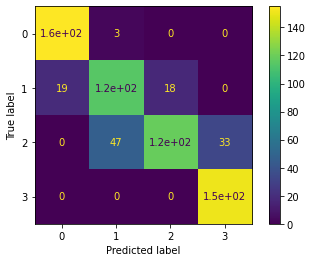

In [281]:
metrics.plot_confusion_matrix(lm, X_test, y_test)

In [282]:
print(metrics.classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       158
           1       0.70      0.76      0.73       152
           2       0.87      0.60      0.71       199
           3       0.82      1.00      0.90       151

    accuracy                           0.82       660
   macro avg       0.82      0.83      0.82       660
weighted avg       0.82      0.82      0.81       660



##KNN

In [313]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [314]:
knn.score(X_test,y_test)

0.9212121212121213

In [228]:
np.array(y_test)

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 3, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 0, 3, 1,
       2, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 2, 2, 1, 1, 3, 1, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 2, 2, 2, 2, 2, 0, 2, 1, 3, 1, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 2, 3,

In [229]:
error_rate = []
for i in range(1,20):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != np.array(y_test)))


Text(0, 0.5, 'Error Rate')

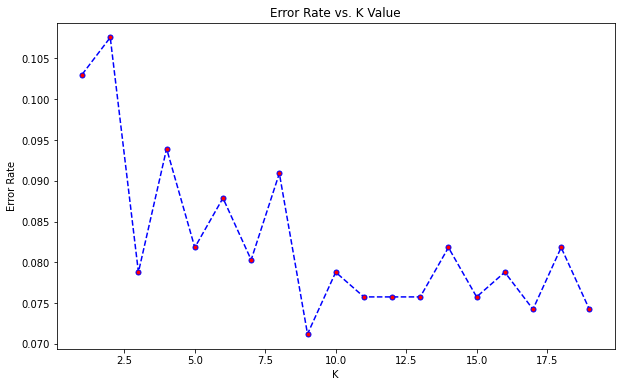

In [230]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',  markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



without normalization

In [315]:
knn1 = KNeighborsClassifier(n_neighbors=9)
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [316]:
knn1.score(X_test,y_test)

0.9287878787878788

after normalization

In [283]:
knn1 = KNeighborsClassifier(n_neighbors=9)
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [284]:
knn1.score(X_test,y_test)

0.346969696969697

without normalization results

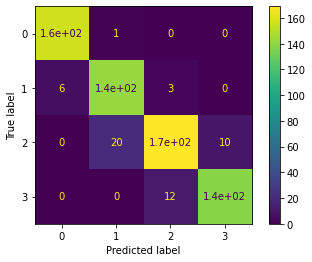

In [318]:
metrics.plot_confusion_matrix(knn, X_test, y_test)

In [319]:
print(metrics.classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       158
           1       0.87      0.94      0.91       152
           2       0.92      0.85      0.88       199
           3       0.93      0.92      0.93       151

    accuracy                           0.92       660
   macro avg       0.92      0.93      0.92       660
weighted avg       0.92      0.92      0.92       660



##SVM

In [233]:
from sklearn import svm

In [241]:
SVM=svm.SVC()

In [322]:
SVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

before normalization

In [323]:
SVM.score(X_test,y_test)

0.946969696969697

after normalization

In [305]:
SVM.score(X_test,y_test)

0.65

Without Normalization

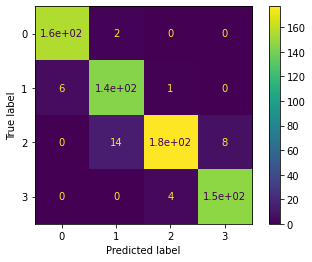

In [324]:
metrics.plot_confusion_matrix(SVM, X_test, y_test)

In [325]:
print(metrics.classification_report(y_test, SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.90      0.95      0.93       152
           2       0.97      0.89      0.93       199
           3       0.95      0.97      0.96       151

    accuracy                           0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



##Decision Tree

In [326]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [364]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

without normalization

In [355]:
dtree.score(X_test,y_test)

0.8181818181818182

with normalization

In [365]:
dtree.score(X_test,y_test)

0.8242424242424242

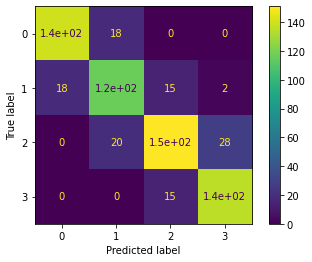

In [366]:
metrics.plot_confusion_matrix(dtree, X_test, y_test)

In [368]:
print(metrics.classification_report(y_test, dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       158
           1       0.75      0.77      0.76       152
           2       0.83      0.76      0.79       199
           3       0.82      0.90      0.86       151

    accuracy                           0.82       660
   macro avg       0.82      0.83      0.83       660
weighted avg       0.82      0.82      0.82       660

